<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [986]:
!pip install cufflinks

In [987]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# plotly packages
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

## Data Gathering and  Preparation

In [988]:
df = pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [990]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [991]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
TVS Wego                     1
Honda Dream Yuga             1
Bajaj Avenger 150 street     1
ignis                        1
KTM RC390                    1
Name: Car_Name, Length: 98, dtype: int64

In [992]:
df.drop(columns="Car_Name", inplace=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [993]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [994]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [995]:
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [996]:
df["Age"] = 2021 - df["Year"]
df.drop(columns=["Year"], inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [997]:
df.iplot(kind="hist",subplots=True);

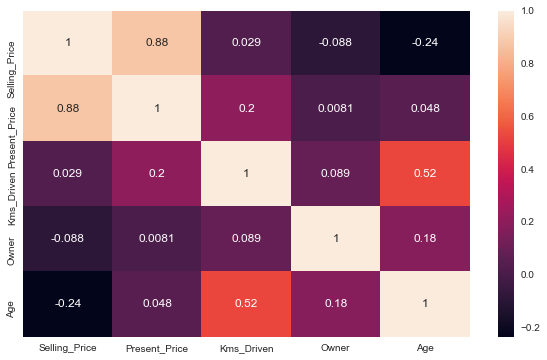

In [998]:
sns.heatmap(df.corr(), annot = True);

## Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>

In [999]:
df2 = pd.get_dummies(df)
df2

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,6,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,12,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,4,0,1,0,1,0,0,1


In [1000]:
from scipy.stats import skew
for i in df2.drop(columns = "Selling_Price").columns:
    print(i, skew(df2[i]))

Present_Price 4.062773999428537
Kms_Driven 6.403895025283172
Owner 7.578839290299513
Age 1.239970249484663
Fuel_Type_CNG 12.14523317862652
Fuel_Type_Diesel 1.5052007581277407
Fuel_Type_Petrol -1.4540470885149632
Seller_Type_Dealer -0.6190415051506463
Seller_Type_Individual 0.6190415051506463
Transmission_Automatic 2.1629278085458243
Transmission_Manual -2.1629278085458243


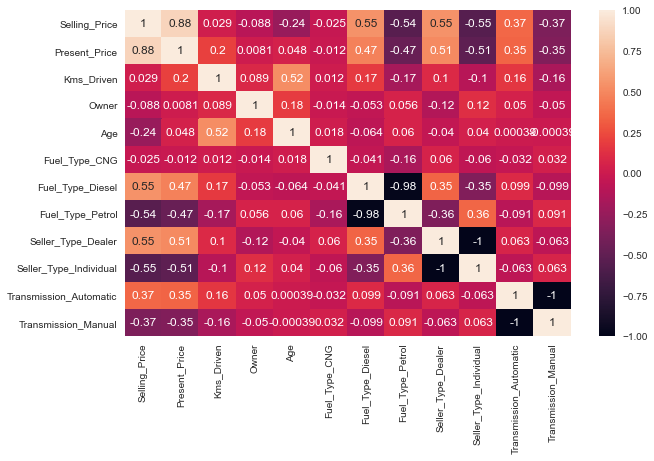

In [1001]:
sns.heatmap(df2.corr(), annot = True);

### Features and target variable

In [1002]:
X = df2.drop(columns = "Selling_Price") 

y = df2["Selling_Price"]

### Splitting data into training and testing

In [1003]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1004]:
df2.sample(15)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
111,1.15,1.50,8700,0,5,0,0,1,0,1,0,1
298,3.35,11.00,87934,0,12,0,0,1,1,0,0,1
135,0.65,0.74,5000,0,6,0,0,1,0,1,0,1
201,3.25,6.79,58000,1,11,0,1,0,1,0,0,1
84,3.49,13.46,197176,0,16,0,1,0,1,0,0,1
267,8.35,9.40,19434,0,5,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,6,0,0,1,1,0,0,1
186,0.25,0.52,22000,0,11,0,0,1,0,1,1,0
218,6.45,9.40,45078,0,7,0,0,1,1,0,0,1
205,5.25,5.70,3493,1,5,0,0,1,1,0,0,1


## Scaling the Data

In [1005]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [1006]:
scaler.fit(X_train)

StandardScaler()

In [1007]:
X_train = scaler.transform(X_train)
X_train

array([[-0.76923237, -0.83904661, -0.18730358, ...,  1.35566878,
         2.85139173, -2.85139173],
       [ 1.26268234,  0.43381798, -0.18730358, ..., -0.73764331,
        -0.35070593,  0.35070593],
       [ 0.38139709,  0.12793616, -0.18730358, ..., -0.73764331,
        -0.35070593,  0.35070593],
       ...,
       [-0.44579392, -0.49554421,  3.38849211, ...,  1.35566878,
        -0.35070593,  0.35070593],
       [ 0.292367  ,  0.74767564, -0.18730358, ..., -0.73764331,
        -0.35070593,  0.35070593],
       [-0.63399678, -0.78963873, -0.18730358, ...,  1.35566878,
        -0.35070593,  0.35070593]])

In [1008]:
X_test = scaler.transform(X_test)
X_test

array([[-0.77035933, -0.31908751, -0.18730358, ...,  1.35566878,
         2.85139173, -2.85139173],
       [ 0.69807376, -0.62541635, -0.18730358, ..., -0.73764331,
        -0.35070593,  0.35070593],
       [ 0.2247492 ,  0.52790469, -0.18730358, ..., -0.73764331,
        -0.35070593,  0.35070593],
       ...,
       [-0.780502  ,  0.29262908, -0.18730358, ...,  1.35566878,
        -0.35070593,  0.35070593],
       [ 2.61503822,  1.21020397, -0.18730358, ..., -0.73764331,
         2.85139173, -2.85139173],
       [-0.66893264, -0.48378043, -0.18730358, ...,  1.35566878,
        -0.35070593,  0.35070593]])

In [1009]:
pd.DataFrame(X_train).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1010]:
pd.DataFrame(X_test).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,10
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


##  Model Building (Linear Regression)

In [1011]:
from sklearn.linear_model import LinearRegression

In [1012]:
model = LinearRegression()

In [1013]:
model.fit(X_train, y_train)

LinearRegression()

In [1014]:
y_pred = model.predict(X_test)
y_pred

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

In [1015]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [1016]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
177,0.35,2.816946,-2.466946
289,10.11,8.021972,2.088028
228,4.95,6.624197,-1.674197
198,0.15,-1.479676,1.629676
60,6.95,8.914869,-1.964869
...,...,...,...
119,1.05,0.948220,0.101780
19,2.65,3.408251,-0.758251
181,0.30,1.225693,-0.925693
79,14.50,16.778463,-2.278463


In [1017]:
result_sample = comparing.head(25)

result_sample

,Actual,pred,residual
177,0.35,2.816946,-2.466946
289,10.11,8.021972,2.088028
228,4.95,6.624197,-1.674197
198,0.15,-1.479676,1.629676
60,6.95,8.914869,-1.964869
9,7.45,7.569783,-0.119783
118,1.10,1.389178,-0.289178
154,0.50,0.867179,-0.367179
164,0.45,1.410448,-0.960448
33,6.00,7.631775,-1.631775


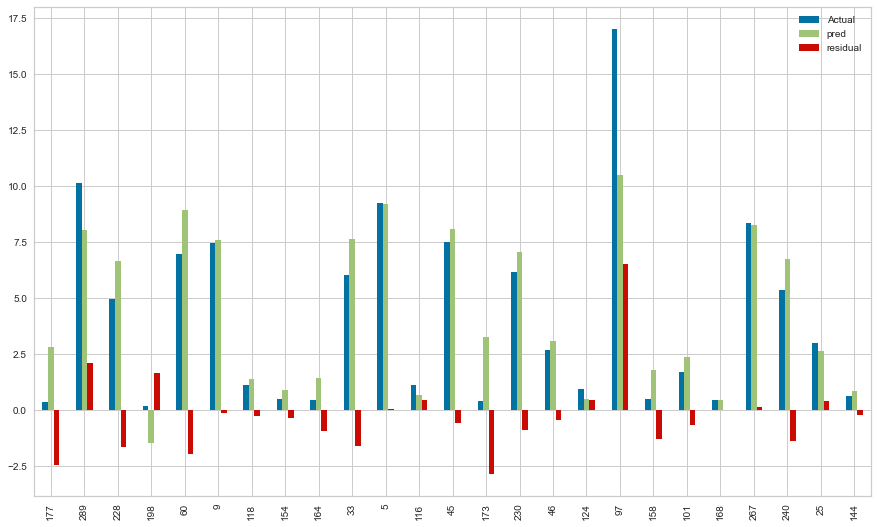

In [1018]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show();

## Error metrics

In [1019]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1020]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.8756155246204997

In [1021]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [1022]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8756155246204997
MAE 		: 1.2698356709065521
MSE 		: 3.5417485009492
RMSE 		: 1.8819533737447376


In [1023]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,2.442667,1.881953
mae,1.550092,1.269836
mse,5.966620,3.541749
R2,0.756888,0.875616


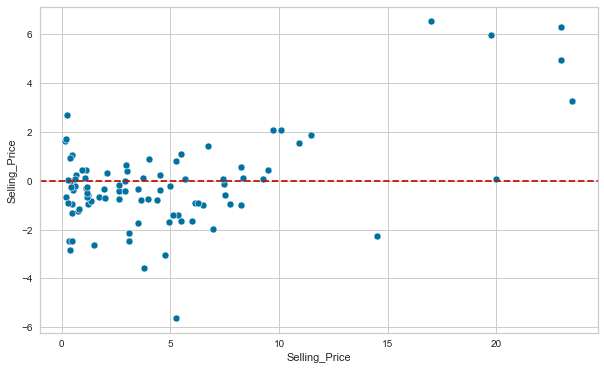

In [1024]:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show();

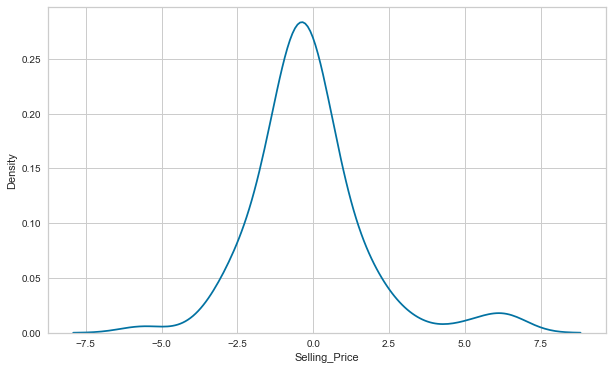

In [1025]:
sns.kdeplot(residuals);

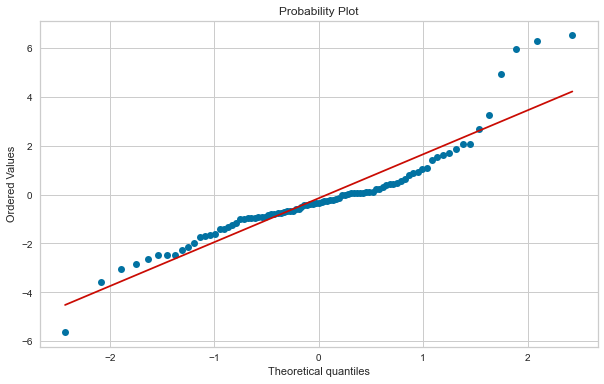

In [1026]:
stats.probplot(residuals, dist="norm", plot=plt);

In [1027]:
from yellowbrick.regressor import PredictionError

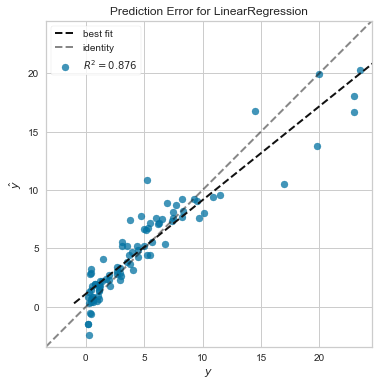

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [1028]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Interpret the model

# Model Evaluation

**************************************

# Regularization

# Ridge

In [1029]:
from sklearn.linear_model import Ridge

In [1030]:
ridge_model = Ridge(alpha=1)

In [1031]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [1032]:
y_pred = ridge_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8748555535127589
MAE 		: 1.27238830936342
MSE 		: 3.563388070705745
RMSE 		: 1.8876938498352283


In [1033]:
y_train_pred = ridge_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8827833629732683
MAE 		: 1.1475530549891984
MSE 		: 2.876805276954987
RMSE 		: 1.6961147593706585


In [1034]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.696115,1.887694
mae,1.147553,1.272388
mse,2.876805,3.563388
R2,0.882783,0.874856


In [1035]:
#choosing alpha 
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import RidgeCV

In [1036]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [1037]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.613090,-1.403032,-5.094995,-2.257210
2,0.846915,-1.748482,-10.320501,-3.212554
3,0.860762,-1.029591,-1.748173,-1.322185
4,0.814446,-1.506576,-4.650301,-2.156456
5,0.886915,-0.651112,-0.581738,-0.762718
6,0.911699,-1.030759,-1.509840,-1.228756
7,0.796910,-1.566983,-9.710542,-3.116174
8,0.783056,-1.170014,-3.677841,-1.917770
9,0.907206,-1.238213,-2.223103,-1.491007
10,0.854903,-0.953724,-1.436328,-1.198469


In [1038]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space         

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [1039]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 20, scoring = "neg_root_mean_squared_error")

In [1040]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=20, scoring='neg_root_mean_squared_error')

In [1041]:
ridge_cv_model.alpha_

1.0

In [1042]:
y_pred = ridge_cv_model.predict(X_test)

In [1043]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8748555535127589
MAE 		: 1.27238830936342
MSE 		: 3.563388070705745
RMSE 		: 1.8876938498352283


In [1044]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metric(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.8827833629732683
MAE 		: 1.1475530549891984
MSE 		: 2.876805276954987
RMSE 		: 1.6961147593706585


In [1045]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.696115,1.887694
mae,1.147553,1.272388
mse,2.876805,3.563388
R2,0.882783,0.874856


# Lasso

In [1046]:
from sklearn.linear_model import Lasso, LassoCV

In [1047]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [1048]:
y_train_pred = lasso_model.predict(X_train)

In [1049]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7718022356742109
MAE 		: 1.5764387515524807
MSE 		: 5.600574707258044
RMSE 		: 2.366553339195642


In [1050]:
y_pred = lasso_model.predict(X_test)

In [1051]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7221832499852927
MAE 		: 1.9534435374747743
MSE 		: 7.910609864302516
RMSE 		: 2.8125806413865746


In [1052]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.366553,2.812581
mae,1.576439,1.953444
mse,5.600575,7.910610
R2,0.771802,0.722183


## Elastic-Net 

In [1053]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [1054]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [1055]:
elastic_model.l1_ratio

0.5

In [1056]:
elastic_model.alpha

1.0

In [1057]:
y_train_pred = elastic_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7568875765923497
MAE 		: 1.5500920525124064
MSE 		: 5.966619758873865
RMSE 		: 2.442666526334257


In [1058]:
y_pred = elastic_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7096791427042275
MAE 		: 1.8267266184056399
MSE 		: 8.266654323092908
RMSE 		: 2.875179007139018


In [1059]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,2.442667,2.875179
mae,1.550092,1.826727
mse,5.966620,8.266654
R2,0.756888,0.709679
